SPC825 Optics directory: /groups/douglase/webbpsf-data/CGI/optics/F825
DEBUG:poppy:Trans: /groups/douglase/webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:poppy:OPD: None
INFO:poppy:This element will be applied using an FFT and MFT sequence to highly sample 
INFO:poppy:Focal Plane Mask: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).


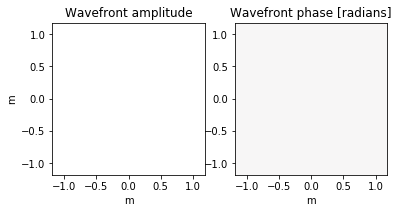

DEBUG:poppy:

------ Applying FITS FPM ------


DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.206121 s, full function  in 0.245 s
DEBUG:poppy:Inverse MatrixFourierTransform: array shape (2048, 2048), centering style ADJUSTABLE, output region size 82.09999999999998 in lambda / D units, output array size 821 pixels, offset None
DEBUG:poppy:Forward MatrixFourierTransform: array shape (821, 821), centering style ADJUSTABLE, output region size 82.09999999999998 in lambda / D units, output array size 2048 pixels, offset None
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.223592 s, full function  in 0.264 s
DEBUG:poppy:------ FITs FPM Optic: Focal Plane Mask applied ------


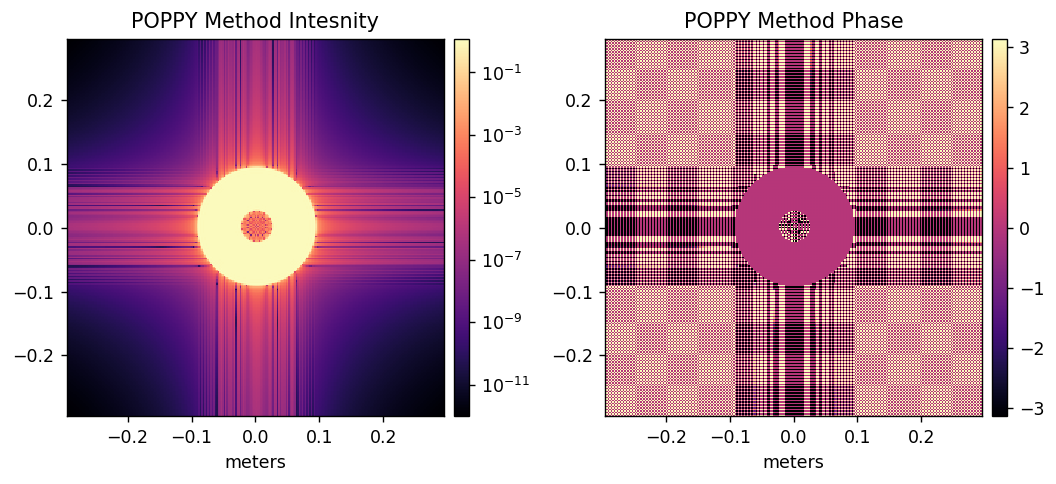

(2048, 2048)


In [1]:
from pathlib import Path
import poppy
from poppy.poppy_core import PlaneType
import numpy as np
import astropy.units as u
import astropy.io.fits as fits

from IPython.display import display
import matplotlib.pyplot as plt

import logging, sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

import misc
from importlib import reload
reload(poppy)
reload(misc)

opticsdir = Path('/groups/douglase/webbpsf-data/CGI/optics/F825'); print('SPC825 Optics directory:',opticsdir)
fpm = poppy.FITSOpticalElement('Focal Plane Mask', str(opticsdir/'fpm_0.05lamdivD.fits'), 
                               planetype=PlaneType.image, 
                               use_fpm_fftmft=True, 
                               wavelength_c=825e-9*u.m, ep_diam=2.3633372*u.m, ep_diam_pix=1000.0,
                               centering='ADJUSTABLE',
                              )

D = 2.3633372*u.m
wf = poppy.FresnelWavefront(wavelength=825e-9, npix=1024, oversample=2, beam_radius=D/2)
fig = plt.figure(); wf.display(what='both'); plt.close(); display(fig)

wf.apply_fits_fpm_fftmft(fpm)

misc.myimshow2(np.abs(wf.wavefront)**2, np.angle(wf.wavefront), 
               'POPPY Method Intesnity', 'POPPY Method Phase',
               n=256, pxscl=wf.pixelscale, lognorm1=True, wspace=0.25)
print(wf.wavefront.shape)

save = False
if save: 
    n = wf.wavefront.shape[0]
    wfarr = np.zeros(shape=(2,n,n))
    wfarr[0,:,:] = np.abs(wf.wavefront)**2
    wfarr[1,:,:] = np.angle(wf.wavefront)

    wf_fpath = 'spc730-fresnel-wavefronts/wf_fpm_test_proper.fits'; print(wf_fpath)
    hdr = fits.Header()
    hdr['PIXELSCL'] = wf.pixelscale.value

    wf_hdu = fits.PrimaryHDU(wfarr, header=hdr)
    wf_hdu.writeto(wf_fpath, overwrite=True)

# Check difference between wavefronts. 



spc825-fresnel-wavefronts/wf_fpm_test_proper.fits


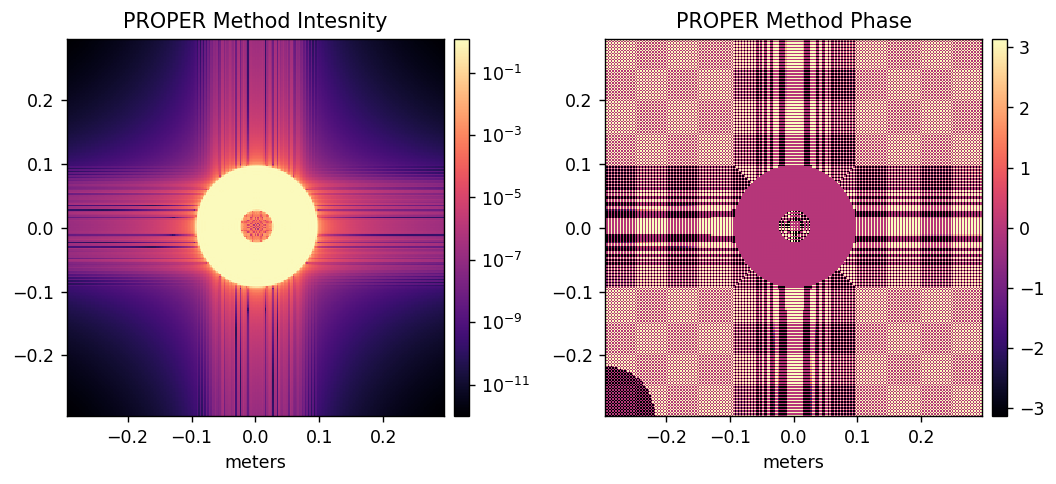

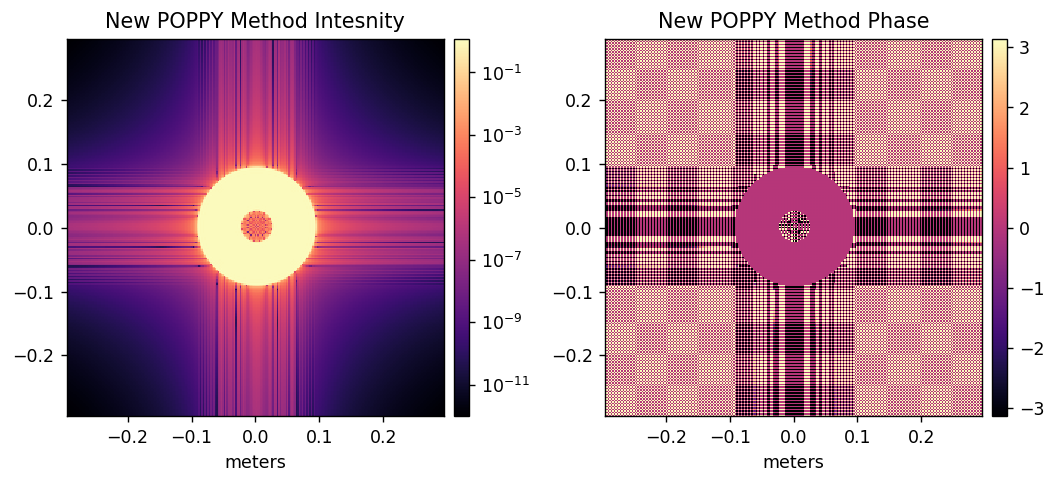

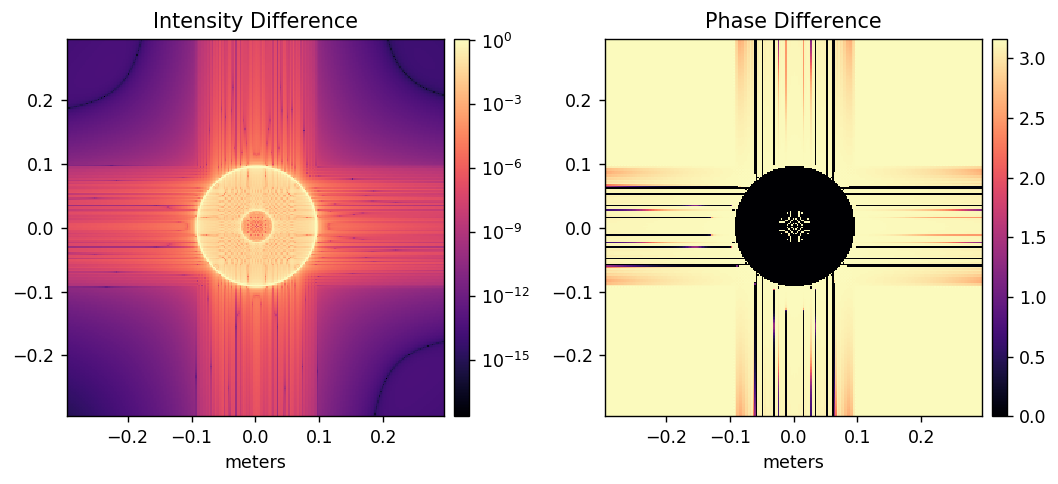

In [2]:
reload(misc)
prop_wf_fpath = 'spc825-fresnel-wavefronts/wf_fpm_test_proper.fits'; print(prop_wf_fpath)
prop_wf = fits.getdata(prop_wf_fpath)
prop_hdr = fits.getheader(prop_wf_fpath)
prop_pxscl = prop_hdr['PIXELSCL']*u.m/u.pix

misc.myimshow2(prop_wf[0], prop_wf[1], 
               'PROPER Method Intesnity', 'PROPER Method Phase',
               n=256, pxscl=prop_pxscl, lognorm1=True, wspace=0.25)

# now show the wf from the poppy method
misc.myimshow2(np.abs(wf.wavefront)**2, np.angle(wf.wavefront), 
               'New POPPY Method Intesnity', 'New POPPY Method Phase',
               n=256, pxscl=wf.pixelscale, lognorm1=True, wspace=0.25)

# now show the difference
misc.myimshow2(np.abs(np.abs(wf.wavefront)**2 - prop_wf[0]),
               np.abs(np.angle(wf.wavefront) - prop_wf[1]), 
               'Intensity Difference', 'Phase Difference',
               n=256, pxscl=wf.pixelscale, 
               lognorm1=True, 
               wspace=0.25)

In [7]:
fpm.amplitude
fpm.opd
fpm.pixelscale
fpm.planetype
fpm.use_fpm_fftmft
fpm.wavelength_c
fpm.ep_diam
# fpm.ep_diam_pix
# fpm.centering

<Quantity 2.3633372 m>

# Make the model and calculate the PSF

DEBUG:poppy:Display pixel scale = 0.0023633372 m / pix 


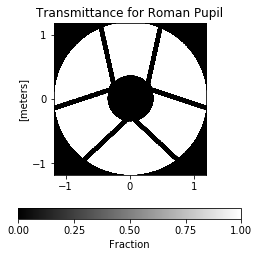

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


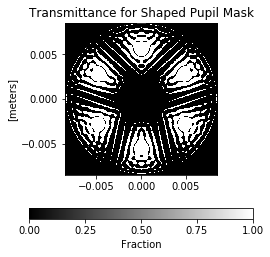

DEBUG:poppy:Display pixel scale = 0.00360017320325374 arcsec / pix 


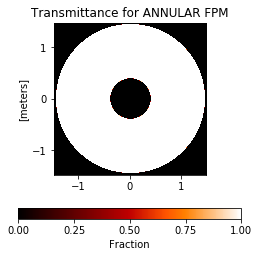

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


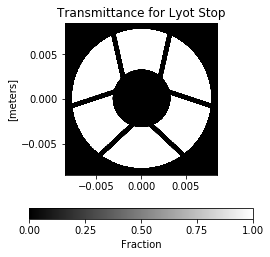

DEBUG:poppy:Display pixel scale = 0.000990599999999999 m / pix 


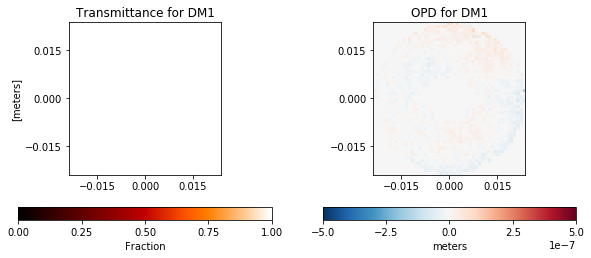

DEBUG:poppy:Display pixel scale = 0.000990599999999999 m / pix 


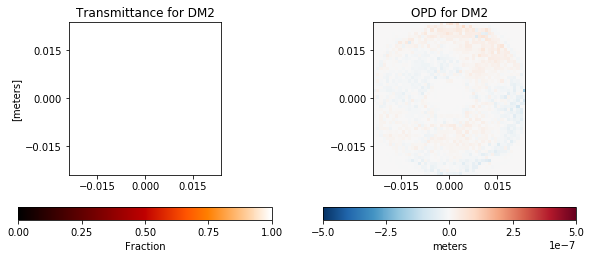

DEBUG:poppy:Display pixel scale = 0.004734 m / pix 


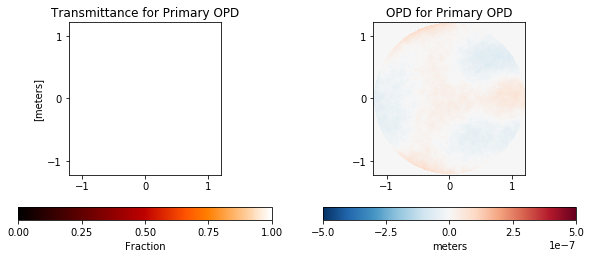

INFO:poppy:Computing both for Zernike WFE sampled onto 512 pixel grid with pixelscale 0.006923839453125 m / pix
DEBUG:poppy:Display pixel scale = 0.006923839453125 m / pix 


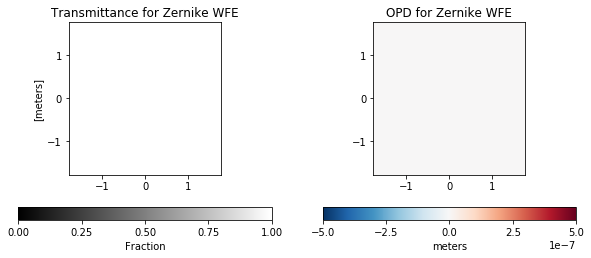

INFO:poppy:Initialized OpticalSystem: SPC825
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Zernike WFE after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Secondary aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 1 after separation: 2.99e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.68e+00 m 
INFO:poppy:Added optic: M-3 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M-4 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: M-5 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 2 after separation: 3.51e-01 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: OAP1 after separation: 3.55e-01 m 
INFO:poppy:Ad

DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 4.803849754328683e-07 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=-0.5531286914439244 m
DEBUG:poppy:Applying spherical phase curvature =-5.53e-01 m
DEBUG:poppy:Applying spherical lens phase =-1.81e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.232163 s, full function  in 0.242 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 2.29e+00 m ------
DEBUG:poppy:

 Hitting propagate_to() in FresnelOpticalSystem 


DEBUG:poppy:------ Applying Lens: Secondary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:6.116e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.469e-06 m
DEBUG:poppy:  Beam radius at Secondary =2.30e-01 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:6.116e-07 m, z

DEBUG:poppy:M4 has a curvature of =-2.30e-01 m
DEBUG:poppy:M4 has a curved output wavefront, with waist at 8.133678565620611 m
DEBUG:poppy:Post Optic Parameters:w_0:2.516e-06 m, z_w0=8.134e+00 m
z=7.903e+00 m, z_r=2.487e-05 m
DEBUG:poppy:Magnification: -0.9814671416190232  from R_in = 0.234673149478124 m, R_out = -0.23032398523302813 m
DEBUG:poppy:Output beam focal length is now 11.677339573450565 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:1/fl=8.6030e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=4.2612e+00 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-4.3417e+00 1 / m
DEBUG:poppy:Applying spherical phase curvature =9.79e+06 m
DEBUG:poppy:Applying spherical lens phase =1.02e-07 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M4
DEBUG:poppy:------ Optic: M4 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: M-4 aperture after distance 0.0 m 
DEBUG:poppy:

 Hitting propagate_to() in FresnelOpticalSystem 


DEBUG:poppy:  Multiplied WF by phasor for Opt

DEBUG:poppy:    FFT_2D: FFT in 0.226641 s, full function  in 0.237 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.02e+01 m ------
DEBUG:poppy:

 Hitting propagate_to() in FresnelOpticalSystem 


DEBUG:poppy:  Multiplied WF by phasor for Optic: FOCM
DEBUG:poppy:  Propagating wavefront to Lens: OAP2, with focal length 0.579156922073536 m after distance 0.314483210543378 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 9.90718807501752 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 2.06634101098804e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=-0.2646737619948656 m
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.233182 s, full function  in 0.243 s
DEBUG:poppy:Applying spherical phase curvature =-2.65e-01 m
DEBUG:poppy:Applying spherical lens phase =-3.78e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic:

DEBUG:poppy:Magnification: -294770.67104505573  from R_in = 0.44695156626815447 m, R_out = -131748.2131135026 m
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-4.91e+05 m
DEBUG:poppy:Applying spherical lens phase =-2.04e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP4
DEBUG:poppy:------ Optic: OAP4 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP4 aperture after distance 0.0 m 
DEBUG:poppy:

 Hitting propagate_to() in FresnelOpticalSystem 


DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP4 aperture
DEBUG:poppy:  Propagating wavefront to Pupil plane: Shaped Pupil Mask  after distance 0.423013568764728 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 14.932241851399482 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.423013568764728 m
DEBUG:poppy:  Constant Pixelscale: 1.6601937579228118e-05 m / pix
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 17.273759731038222 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.687567667550736 m
DEBUG:poppy:  Constant Pixelscale: 1.660204524290635e-05 m / pix
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.228580 s, full function  in 0.239 s
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.235380 s, full function  in 0.246 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.69e+01 m ------
DEBUG:poppy:

 Hitting propagate_to() in FresnelOpticalSystem 


DEBUG:poppy:Non-matching pixel scales for wavefront and optic. Need to interpolate. Pixelscales: wave 1.660204524290635e-05 m / pix, optic 1.7e-05 m / pix
DEBUG:poppy:resampled optic to match wavefront via spline interpolation by a zoom factor of 1.02
DEBUG:poppy:resampled optic shape: (1026, 1026)   wavefront shape: (2048, 2048)
DEBUG:poppy:padded an optic 

DEBUG:poppy:

 Hitting propagate_to() in FresnelOpticalSystem 


DEBUG:poppy:------ Applying Lens: LENS ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.532e-03 m, z_w0=1.853e+01 m
z=1.880e+01 m, z_r=2.518e+01 m
DEBUG:poppy:  Beam radius at LENS =2.53e-03 m
DEBUG:poppy: input flat wavefront and LENS has output beam curvature of =-2.96e-01 m
DEBUG:poppy:LENS has a curvature of =-2.96e-01 m
DEBUG:poppy:LENS has a curved output wavefront, with waist at 19.093167802964196 m
DEBUG:poppy:Post Optic Parameters:w_0:2.977e-05 m, z_w0=1.909e+01 m
z=1.880e+01 m, z_r=3.479e-03 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.296018684431726 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =2.14e+03 m
DEBUG:poppy:Applying spherical lens phase =4.67e-04 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: LENS
DEBUG:poppy:------ Optic: LENS applied ------
DEBUG:p

<Figure size 1080x1080 with 0 Axes>

(2048, 2048) 2.337649770983723e-05 m / pix


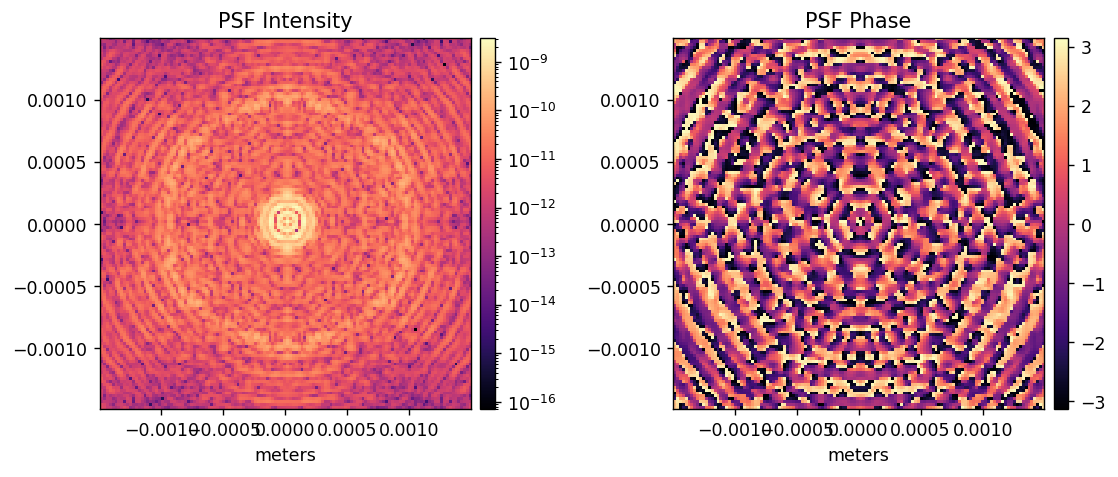

spc825-fresnel-wavefronts/wf_psf_proper.fits
(512, 512) 4.82220602006288e-06 m / pix


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Circle
import numpy as np
import astropy.io.fits as fits 
import astropy.units as u
import time

import proper
import poppy

import wfirst_phaseb_proper
wfirst_phaseb_proper.set_data_dir()

wfirst_phaseb_proper.copy_here()
wfirst_phaseb_proper.copy_examples_here()

from importlib import reload
import misc
reload(misc)

import Roman_POPPY_SPC825_model_single as model
reload(model)

tilts = (300e-9, 0)
psf,wfs = model.run_model(npix=1024,
                          oversample=2,
                          lambda_m=800e-9*u.m,
#                           tilts=tilts,
                          use_fpm=True,
                          use_errors=False,
                          use_dms=False,
#                           display_intermediates=True,
                         )



(2048, 2048) 1.3301298784040454e-05 m / pix


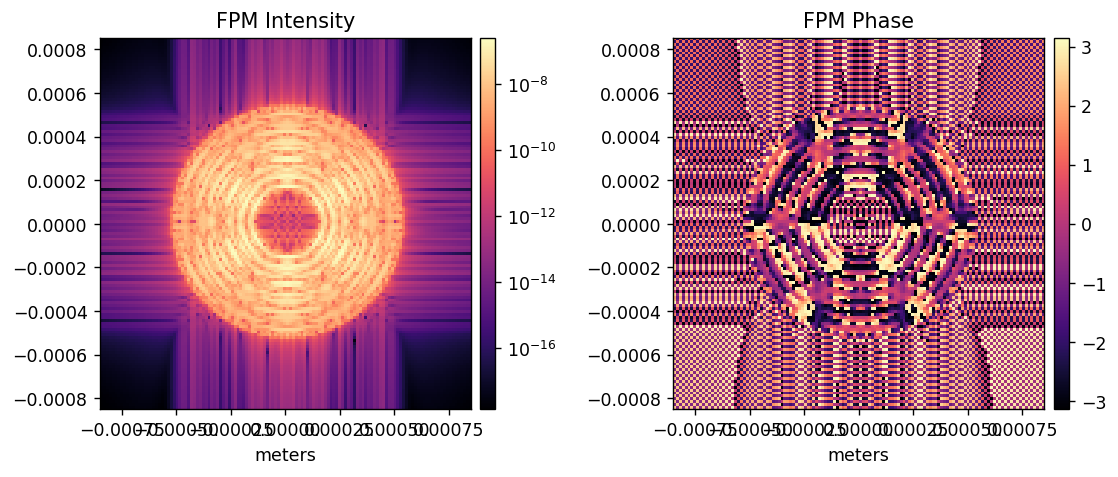

In [2]:
reload(misc)
wfnum = 26
npop = wfs[wfnum].wavefront.shape[0]
pop_wf = wfs[wfnum].wavefront
pop_samp = wfs[wfnum].pixelscale
print(pop_wf.shape, pop_samp)

misc.myimshow2(np.abs(pop_wf)**2, np.angle(pop_wf),
               'FPM Intensity', 'FPM Phase',
               n=128,
               lognorm1=True,
               pxscl=wfs[wfnum].pixelscale)

Lambda = 8.0000E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  79.5982
PROPER calculation completed in 79.8261s


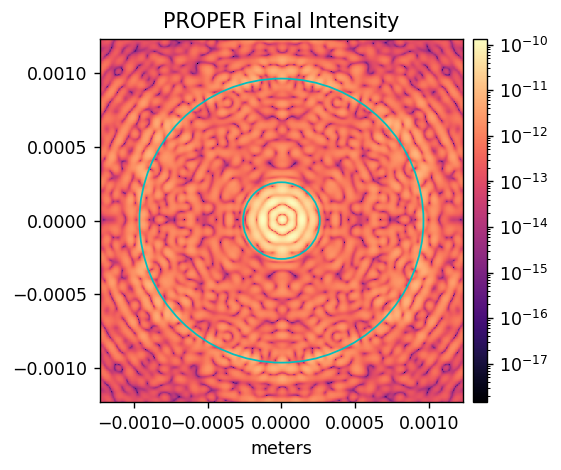

spc825-fresnel-wavefronts/wf_psf_proper.fits


In [3]:
nlam = 1
lam_array = np.array([0.800])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

use_fpm = 1

use_errors = 0
if use_errors==0:
    use_dm1 = 0
    use_dm2 = 0
    polaxis = 0
else:
    use_dm1 = 1
    use_dm2 = 1
    polaxis = 10

dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm2.fits' )

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-wide',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':0,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 5.4/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 20/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              lognorm=True,
              pxscl=psf_sampling_m,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

if use_errors==0:
    if use_fpm==1:
        wf_fpath = 'spc825-fresnel-wavefronts/wf_psf_proper.fits'; print(wf_fpath)
    else: 
        wf_fpath = 'spc825-fresnel-wavefronts/wf_psf_nofpm_proper.fits'; print(wf_fpath)
else: 
    if use_fpm==1:
        wf_fpath = 'spc825-fresnel-wavefronts/wf_ab_psf_proper.fits'; print(wf_fpath)
    else:
        wf_fpath = 'spc825-fresnel-wavefronts/wf_ab_psf_nofpm_proper.fits'; print(wf_fpath)
hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fpath, overwrite=True)